In [10]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import json
import requests
from bs4 import BeautifulSoup
from modules.functions import get_schedule,create_home_and_away_simple_dataframe,plot_game_trends
from modules.functions import calculate_possessions,get_agg_boxscore,get_game_timestamp_half,clean_dataframe
from IPython.display import clear_output
import time

In [11]:
get_schedule("Purdue")

,DATE,OPPONENT,GAME_ID
2,"Tue, Nov 8",Milwaukee,401483405
3,"Fri, Nov 11",Austin Peay,401483406
4,"Tue, Nov 15",Marquette,401479696
5,"Thu, Nov 24",West Virginia,401483331
6,"Fri, Nov 25",Gonzaga,401486748
7,"Sun, Nov 27",Duke,401486751
8,"Wed, Nov 30",@ Florida State,401479679
9,"Sun, Dec 4",Minnesota,401484836
10,"Wed, Dec 7",Hofstra,401483407
11,"Sat, Dec 10",@ Nebraska,401484843


In [18]:
game_id = 401484924

n_tries = 0

try:
    test_df
except NameError as e:
    test_df = pd.DataFrame()

last_reported_time = None

while n_tries < 10:

    
    timestamp,half = get_game_timestamp_half(game_id)

    if timestamp != last_reported_time:
        last_reported_time = timestamp
        n_tries = 0
        clear_output()
        last_reported_time = timestamp
        temp_df = get_agg_boxscore(game_id = game_id,disp = True)
        temp_df = temp_df.transpose().rename_axis("Team").reset_index()
        temp_df['Half'] = half
        temp_df['Timestamp'] = timestamp
        test_df = pd.concat([test_df,temp_df])
        create_home_and_away_simple_dataframe(game_id,disp = True)
        time.sleep(np.random.randint(12,17))
    else:
        time.sleep(25)
        n_tries +=1

,Purdue,Michigan State
PTS,77,61
FGM,29,23
FGA,58,48
3PM,7,5
3PA,17,10
FTM,12,10
FTA,22,16
OREB,11,1
DREB,25,22
TO,8,13


Player  PTS  FGM  FGA  3PM  3PA  FTM  FTA  OREB  DREB  \
Michigan State 0     J. Hauser    3    1    4    1    1    0    0     0     5   
               1    M. Sissoko    4    2    3    0    0    0    0     1     1   
               2      J. Akins   12    5    9    1    2    1    1     0     2   
               3    A. Hoggard   20    6   10    1    2    7    9     0     4   
               4     T. Walker    9    4   11    0    0    1    2     0     4   
               5     J. Kohler    0    0    0    0    0    0    0     0     2   
               6       M. Hall    8    3    6    1    2    1    2     0     2   
               7     C. Cooper    2    1    1    0    0    0    2     0     1   
               8   T. Holloman    0    0    1    0    0    0    0     0     1   
               9     P. Brooks    3    1    3    1    3    0    0     0     0   
               10   J. Whitens    0    0    0    0    0    0    0     0     0   
               11         Team   61   23   48    5   10   10   16     1    22   

                   REB  AST  STL  BLK  TO  PF  PTS/FGA Position  
Michigan State 0     5    1    0    1   2   2     0.75        F  
               1     2    0    1    1   2   3     1.33        C  
               2     2    2    0    0   3   1     1.33        G  
               3     4    6    1    0   2   3     2.00        G  
               4     4    2    2    0   1   4     0.82        G  
               5     2    1    0    0   0   1     0.00        F  
               6     2    1    1    1   2   2     1.33        F  
               7     1    0    1    1   1   2     2.00        C  
               8     1    0    0    0   0   0     0.00        G  
               9     0    0    0    0   0   1     1.00        G  
               10    0    1    0    0   0   0     0.00        G  
               11   23   14    6    4  13  19    10.56

Player  PTS  FGM  FGA  3PM  3PA  FTM  FTA  OREB  DREB  \
Purdue 0          C. Furst    0    0    2    0    1    0    0     0     5   
       1           Z. Edey   38   15   24    0    0    8   12     8     5   
       2          B. Smith    3    0    3    0    2    3    4     0     2   
       3          F. Loyer    9    4    8    1    3    0    0     0     1   
       4         E. Morton    6    2    4    1    2    1    6     0     6   
       5   T. Kaufman-Renn    4    2    4    0    0    0    0     1     0   
       6        B. Waddell    0    0    0    0    0    0    0     0     1   
       7         M. Gillis    3    1    2    1    2    0    0     1     1   
       8         B. Newman    3    1    5    1    3    0    0     0     3   
       9    D. Jenkins Jr.   11    4    6    3    4    0    0     1     1   
       10             Team   77   29   58    7   17   12   22    11    25   

           REB  AST  STL  BLK  TO  PF  PTS/FGA Position  
Purdue 0     5    4    1    1   1   0     0.00        F  
       1    13    3    3    1   0   2     1.58        C  
       2     2    3    0    0   1   0     1.00        G  
       3     1    1    0    0   1   1     1.12        G  
       4     6    3    0    0   1   1     1.50        G  
       5     1    0    1    0   2   2     1.00        F  
       6     1    0    0    0   0   0     0.00        F  
       7     2    4    0    0   0   2     1.50        F  
       8     3    2    0    0   0   2     0.60        G  
       9     2    1    0    0   2   4     1.83        G  
       10   36   21    5    2   8  14    10.13

In [15]:
def plot_game_trends(test_df,half = 1,color1 = 'black',color2 = 'blue'):
  melted = test_df.reset_index()
  #melted = test_df.copy()
  for i in melted.columns.tolist()[1:18]:
    plt.figure(figsize = (14,8))
    sns.lineplot(data = melted[melted.Half ==half].iloc[1:,:],
                x = 'Timestamp',
                y = i,
                hue = 'Team',
                palette = [color2,color1])
    plt.title(f"{melted.Team.tolist()[0]} vs {melted.Team.tolist()[1]}: {i.replace('_',' ')}")
    plt.ylabel(i.replace('_',' '))
    plt.xlabel('Time Remaining, 2nd Half')
    if half == 1:
      plt.xlabel('Time Remaining, 1st Half')
    plt.show();

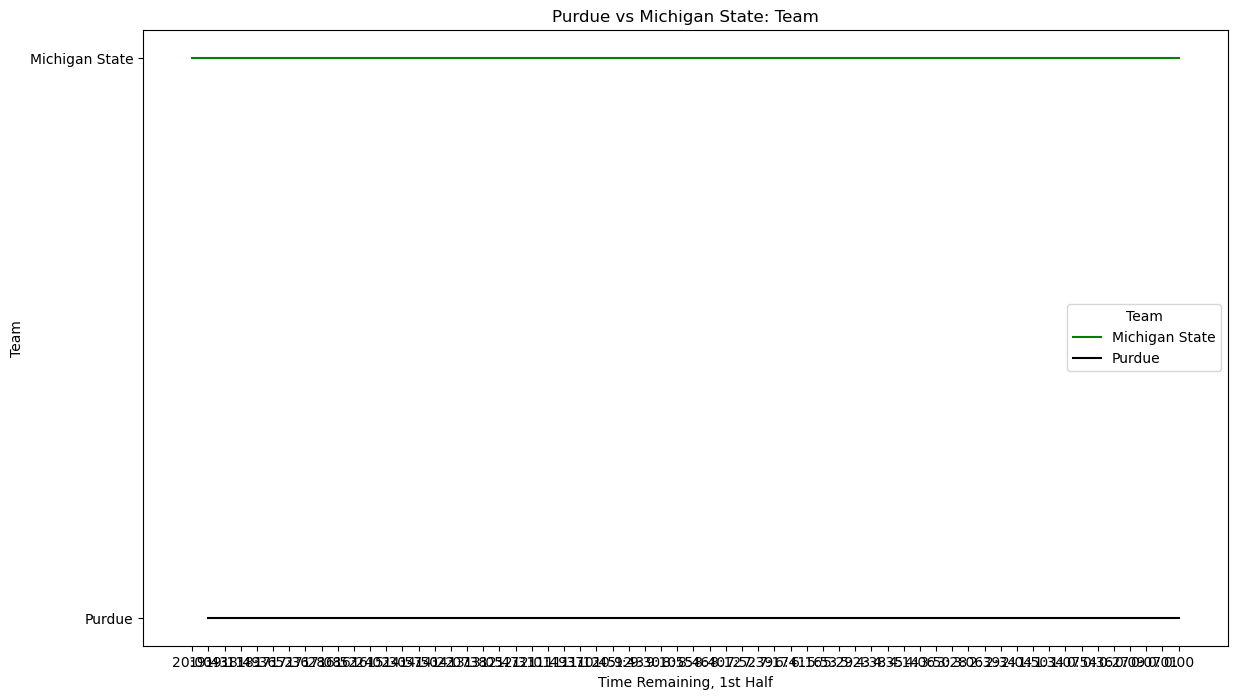

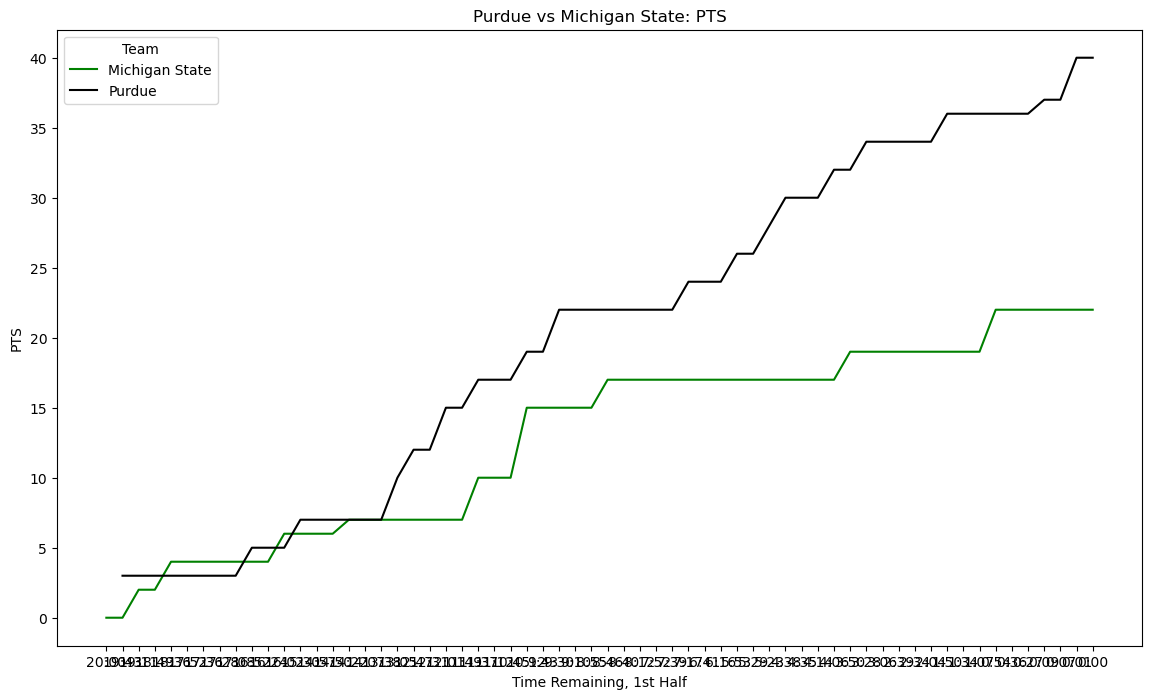

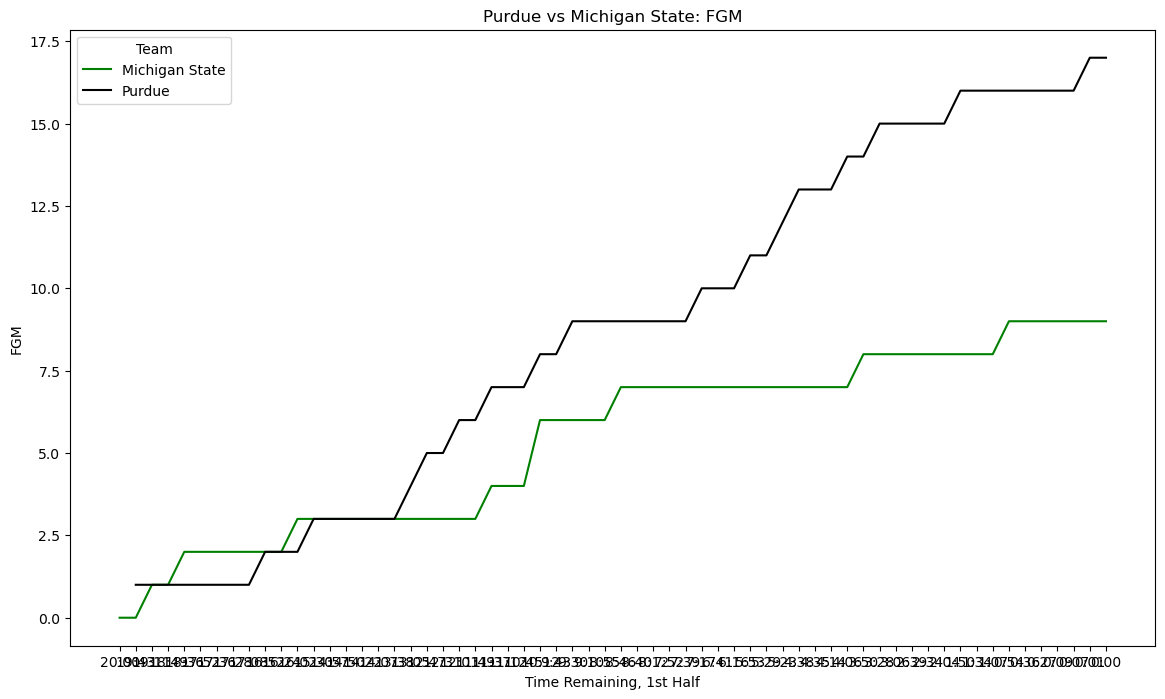

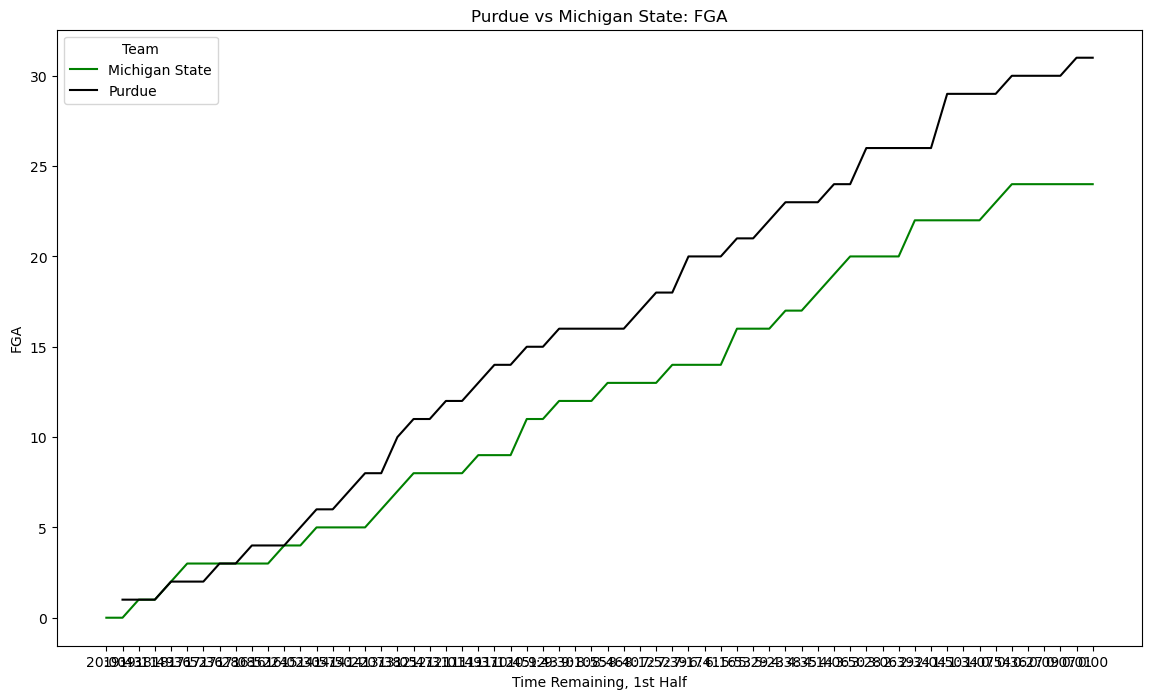

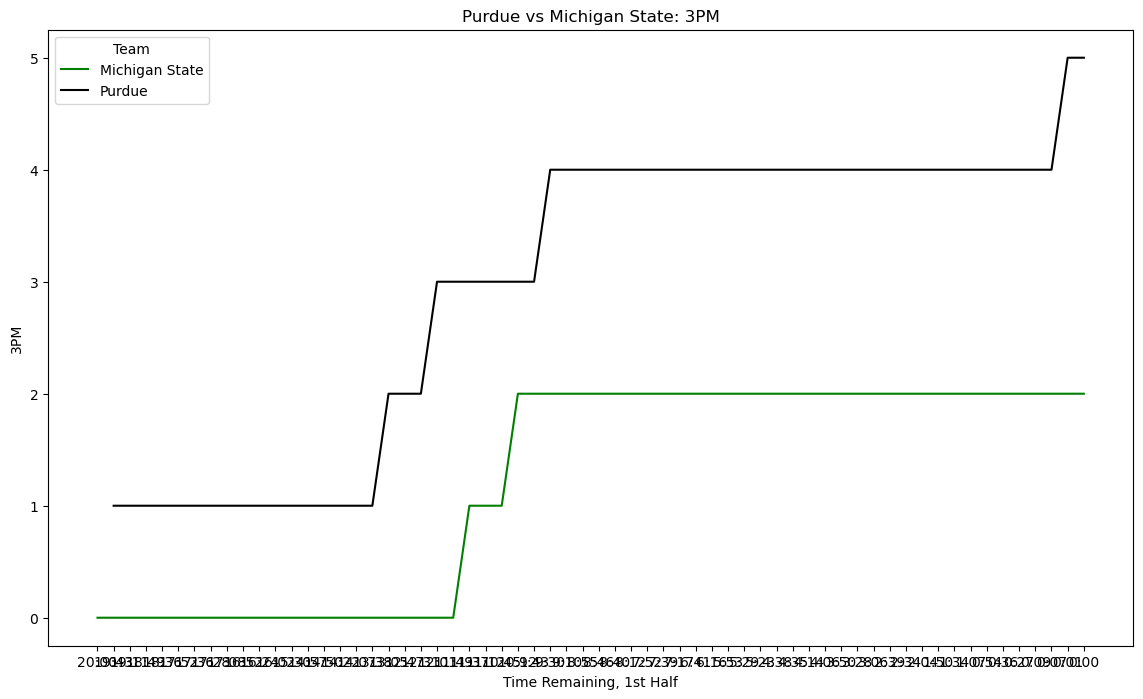

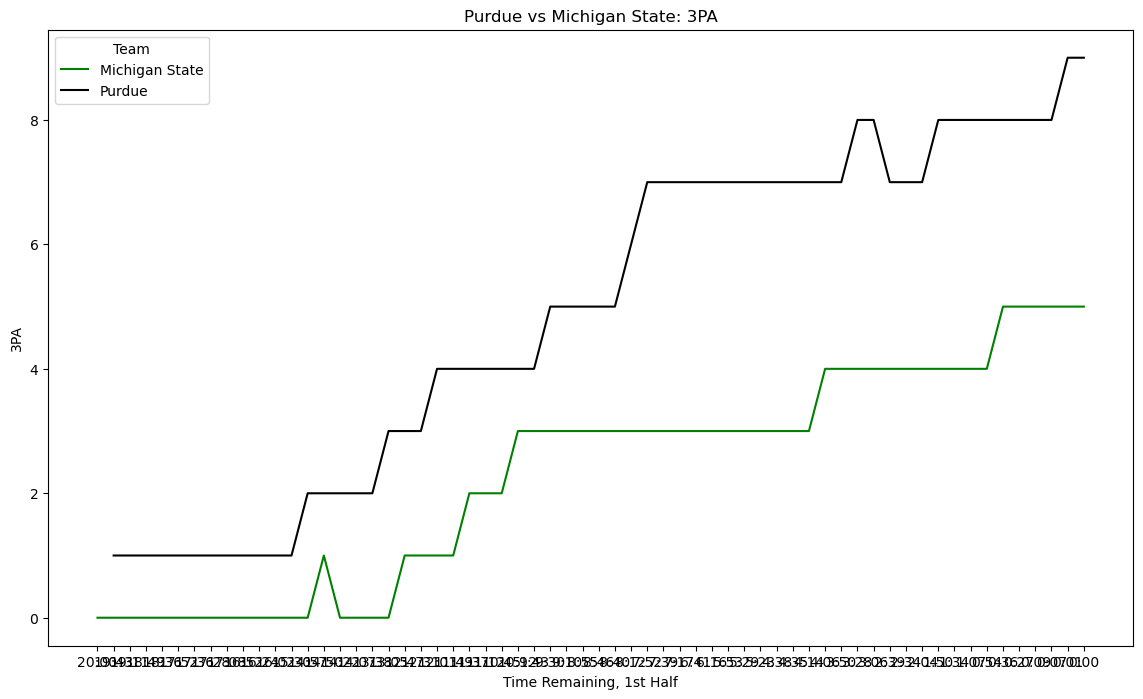

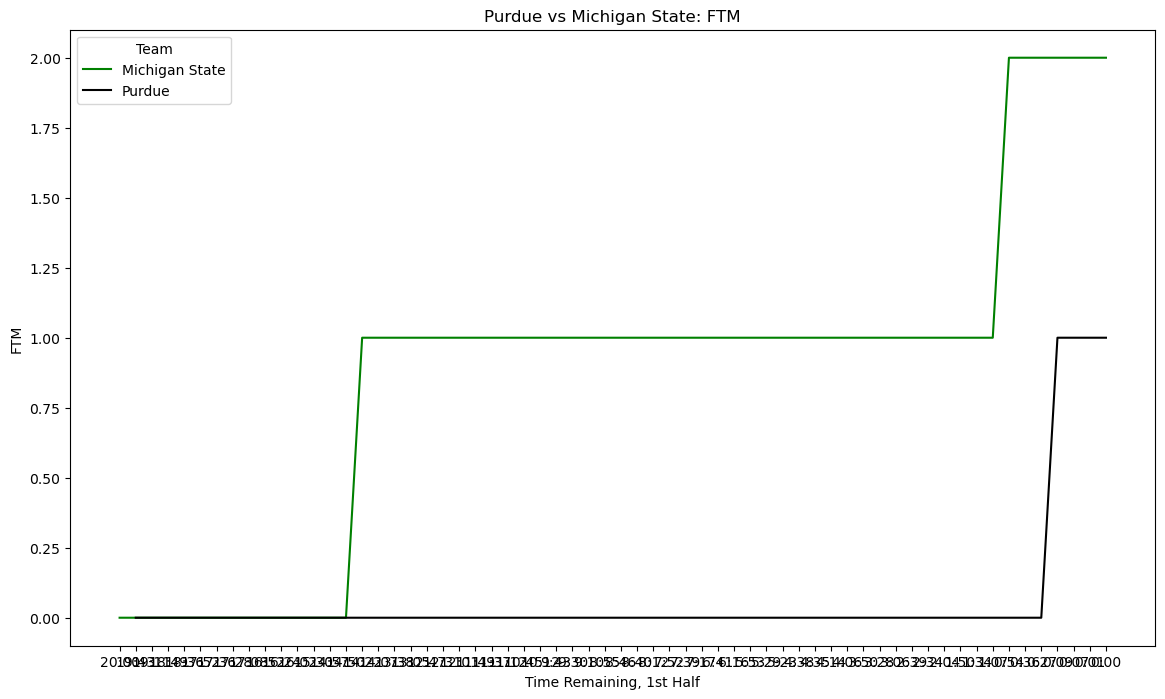

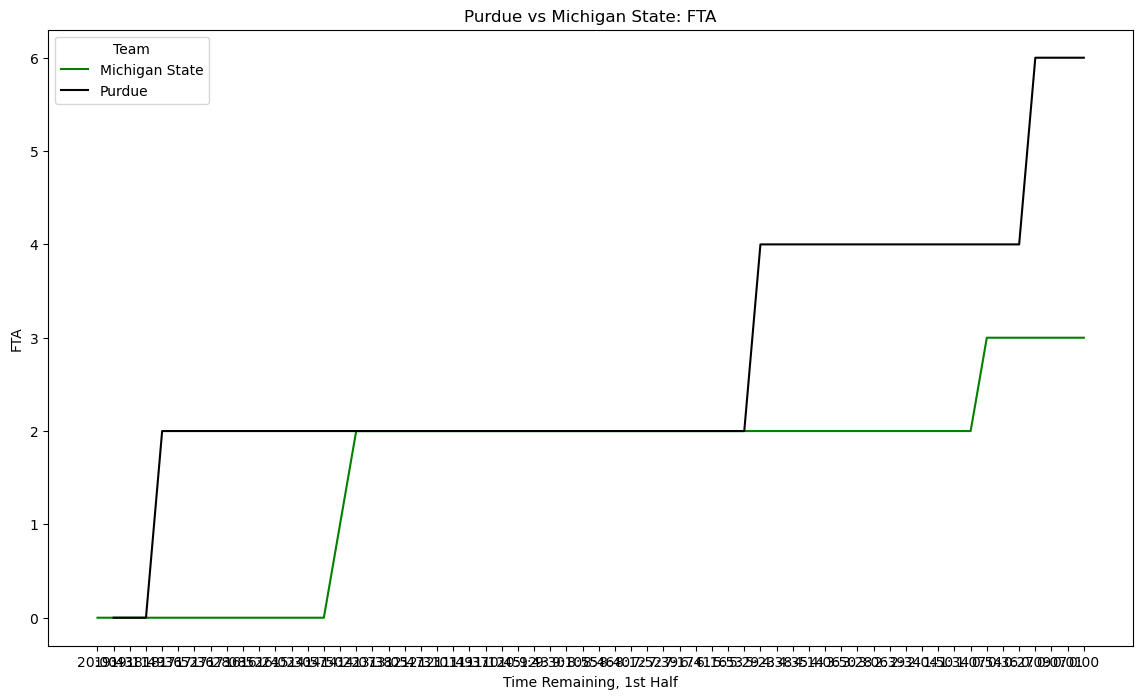

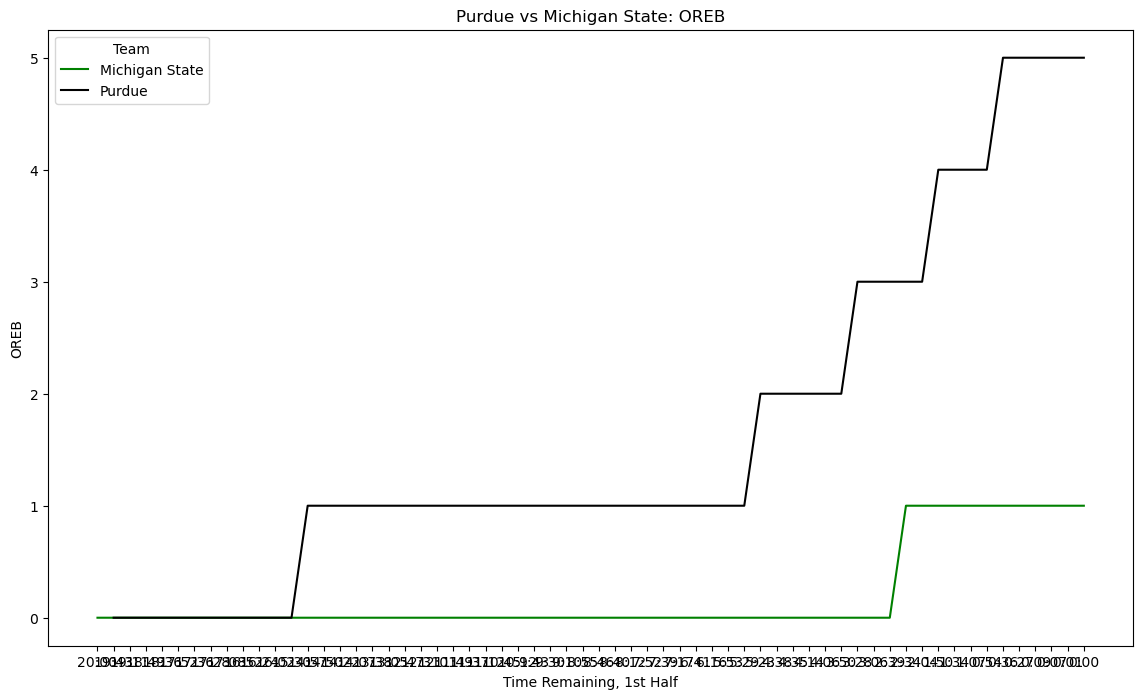

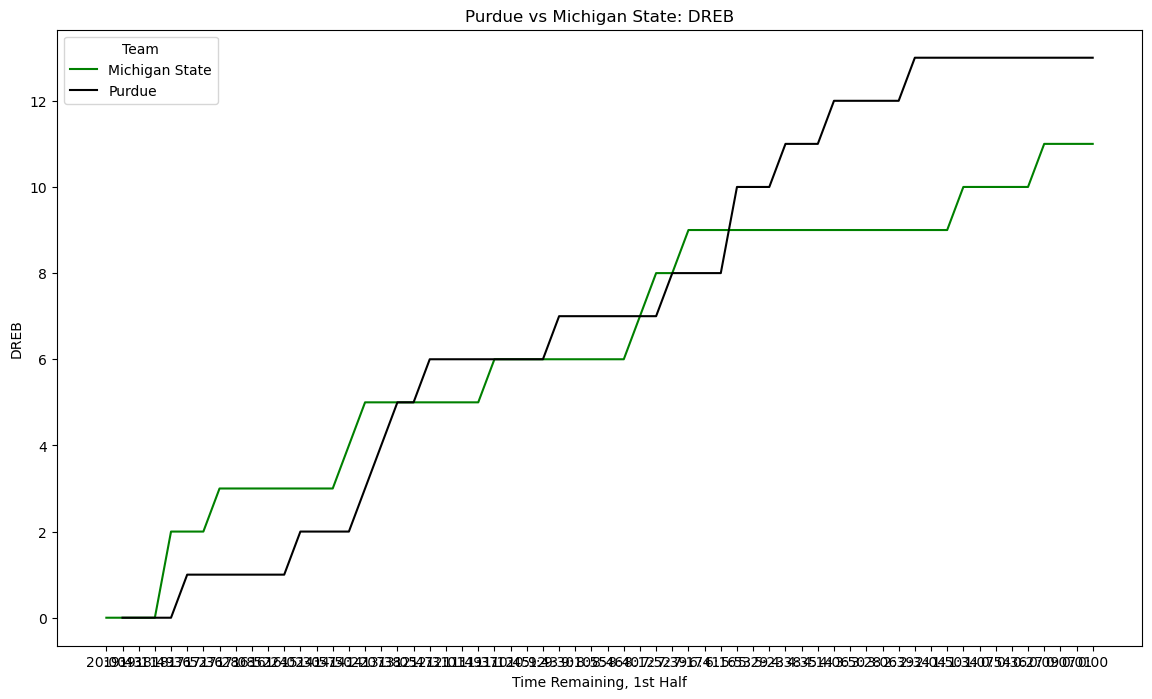

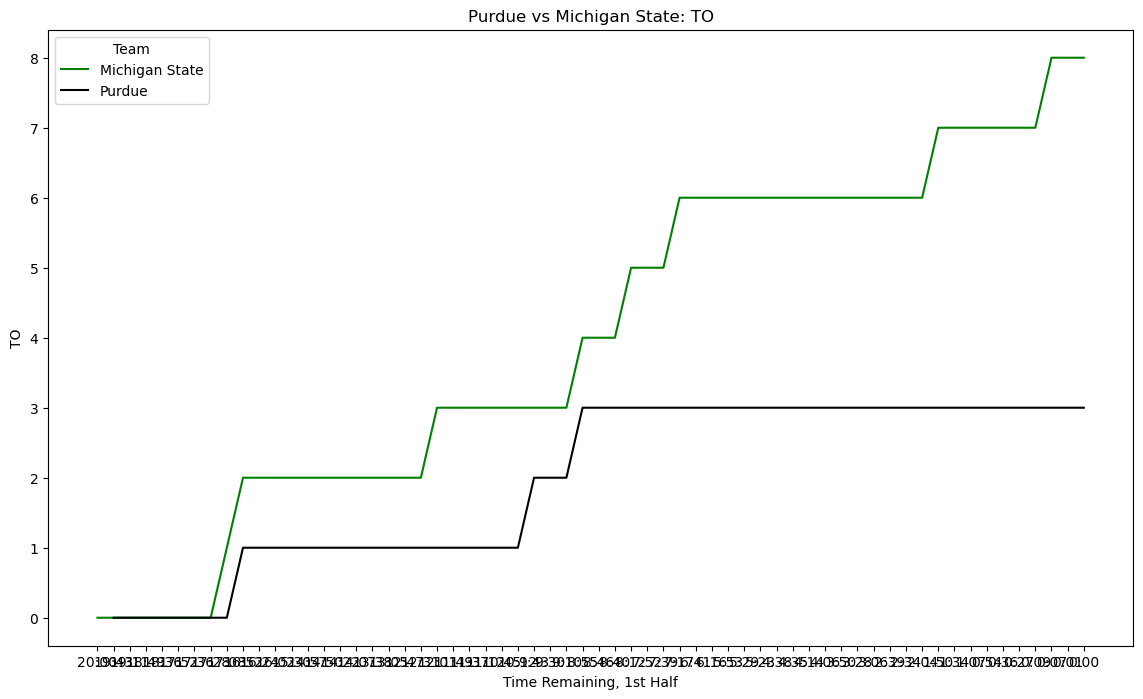

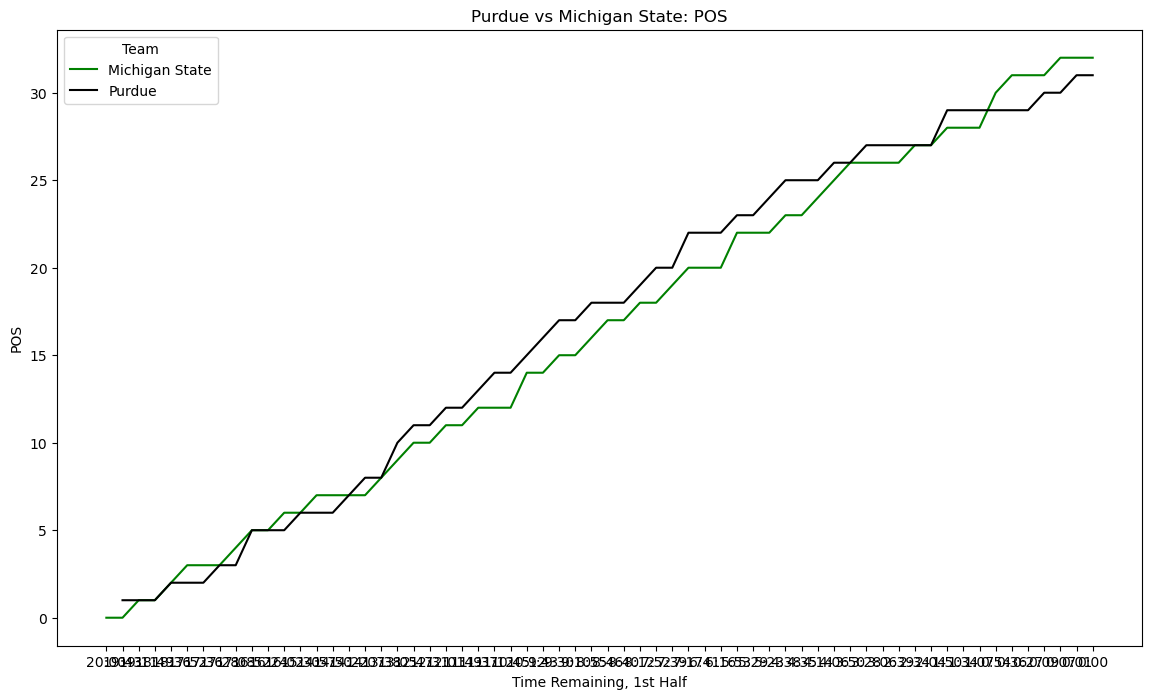

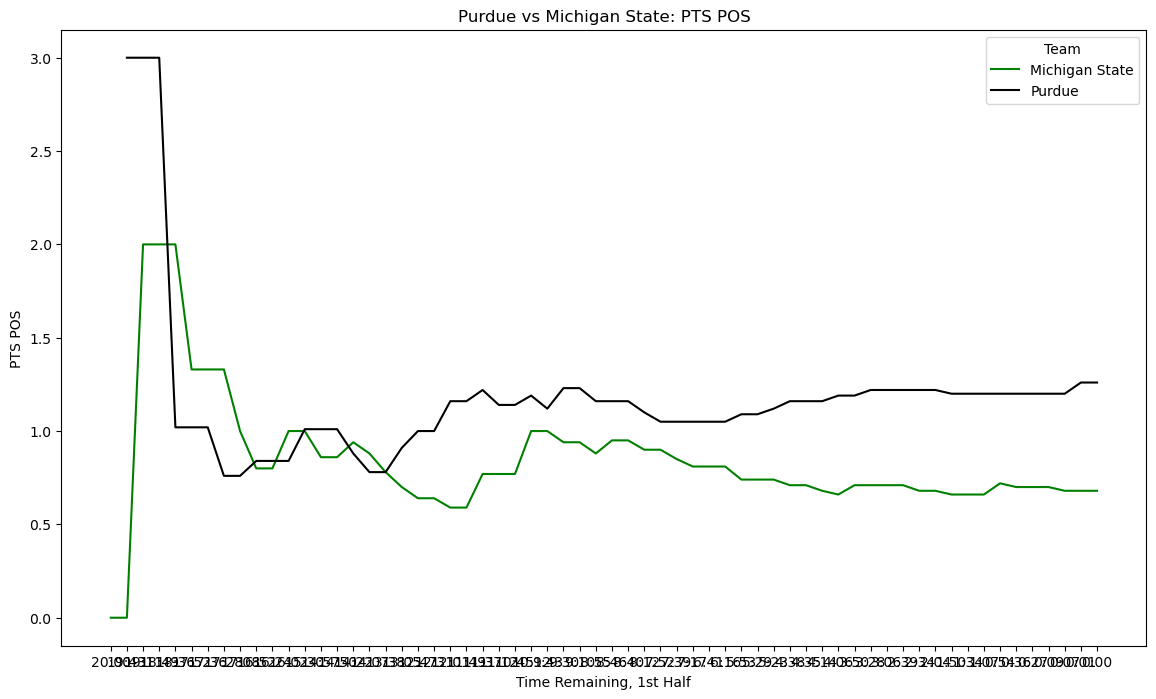

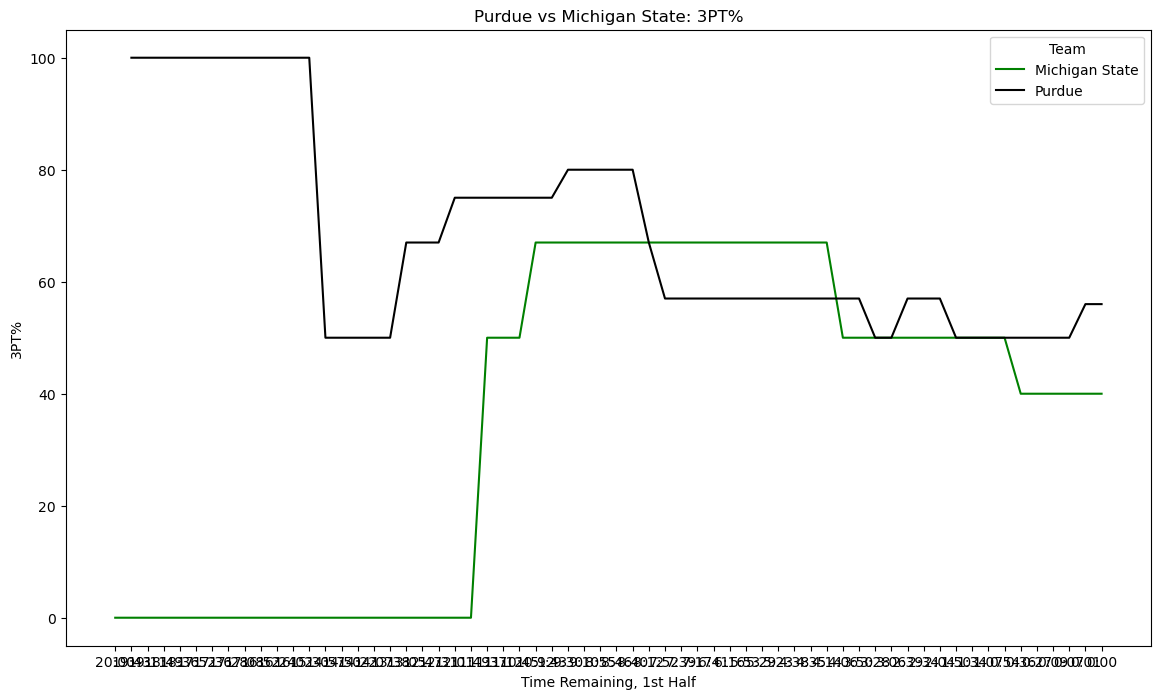

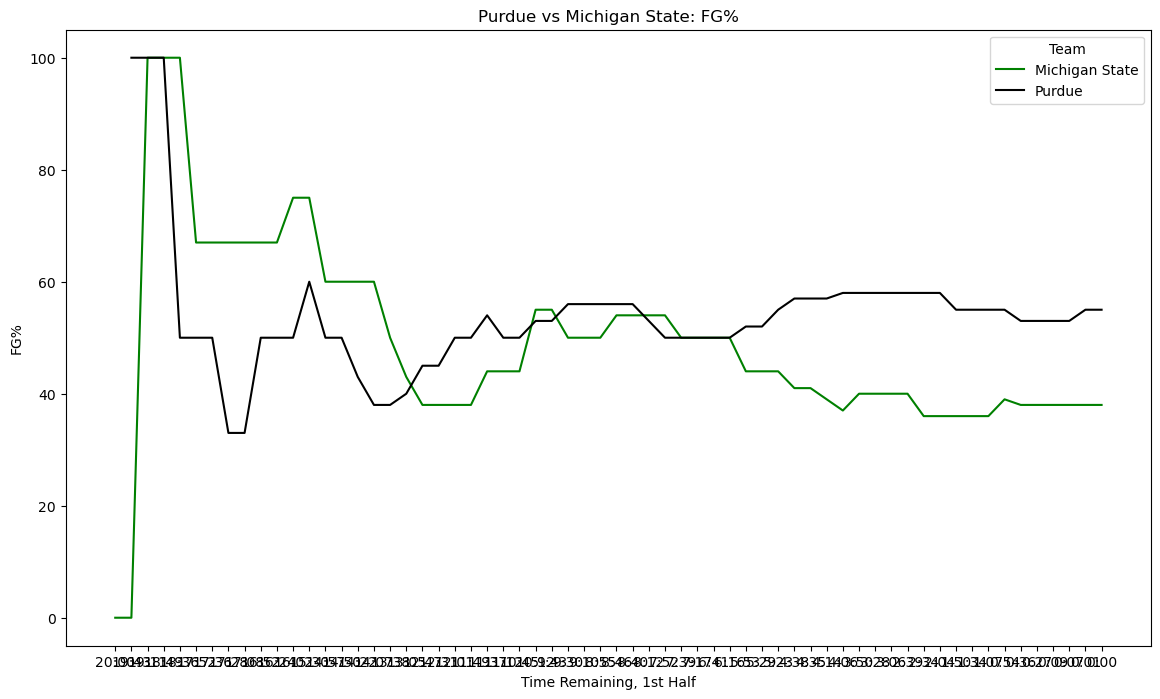

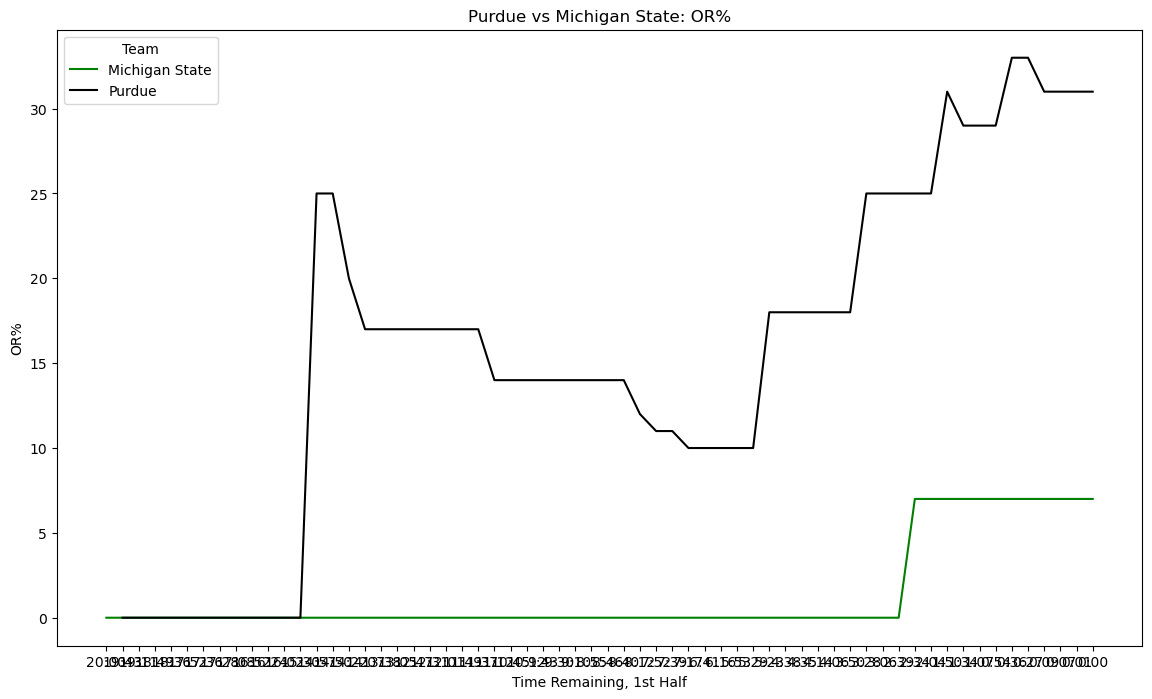

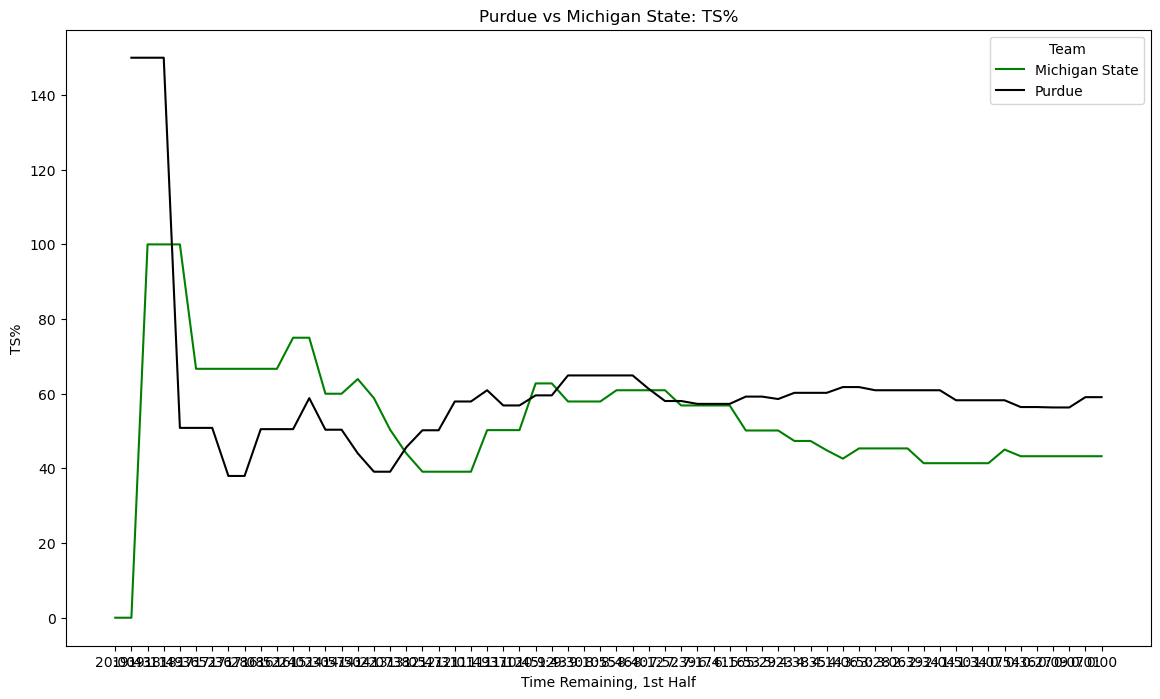

In [17]:
plot_game_trends(test_df,half = half,color1='black',color2='green')